### Task 1

#### Objective: Build a machine learning model to predict the Aggregate rating of a restaurant based on other features.

#### Steps:

1. Preprocess the dataset by handling missing values,encoding categorical variables, and splitting the data into training and testing sets.

2. Select a regression algorithm (e.g., linear regression,decision tree regression) and train it on the training data.

3. Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared) on the testing data.

4. Interpret the model's results and analyze the most influential features affecting restaurant ratings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape

(9551, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
print("Columns with missing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Columns with missing values:
Cuisines    9
dtype: int64


In [8]:
df.dropna(subset=['Cuisines'],inplace=True)

In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
for column in df.columns:
    distinct_values = df[column].unique()
    print(f"Distinct values for column '{column}':")
    print(distinct_values)
    print("-" * 100)

Distinct values for column 'Restaurant ID':
[6317637 6304287 6300002 ... 5915807 5916112 5927402]
----------------------------------------------------------------------------------------------------
Distinct values for column 'Restaurant Name':
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A���k Kahve' "Walter's Coffee Roastery"]
----------------------------------------------------------------------------------------------------
Distinct values for column 'Country Code':
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
----------------------------------------------------------------------------------------------------
Distinct values for column 'City':
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras�_lia'
 'Rio de Janeiro' 'S��o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Cla

In [11]:
unique_counts = df.nunique()

# Display the counts
print("Count of unique values for each column:")
print(unique_counts)

Count of unique values for each column:
Restaurant ID           9542
Restaurant Name         7437
Country Code              15
City                     140
Address                 8910
Locality                1206
Locality Verbose        1263
Longitude               8111
Latitude                8668
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64


In [12]:
df.duplicated().sum()

0

In [13]:
df.corr(numeric_only=True)

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.146270,-0.224362,-0.052626,-0.001629,-0.134528,-0.327160,-0.147434
Country Code,0.146270,1.000000,-0.694629,0.018049,0.043717,0.245363,0.281295,0.154361
Longitude,-0.224362,-0.694629,1.000000,0.045415,0.045948,-0.080257,-0.114733,-0.084371
Latitude,-0.052626,0.018049,0.045415,1.000000,-0.111080,-0.166735,0.000197,-0.022914
Average Cost for two,-0.001629,0.043717,0.045948,-0.111080,1.000000,0.075111,0.051864,0.067833
Price range,-0.134528,0.245363,-0.080257,-0.166735,0.075111,1.000000,0.438356,0.309474
Aggregate rating,-0.327160,0.281295,-0.114733,0.000197,0.051864,0.438356,1.000000,0.313474
Votes,-0.147434,0.154361,-0.084371,-0.022914,0.067833,0.309474,0.313474,1.000000


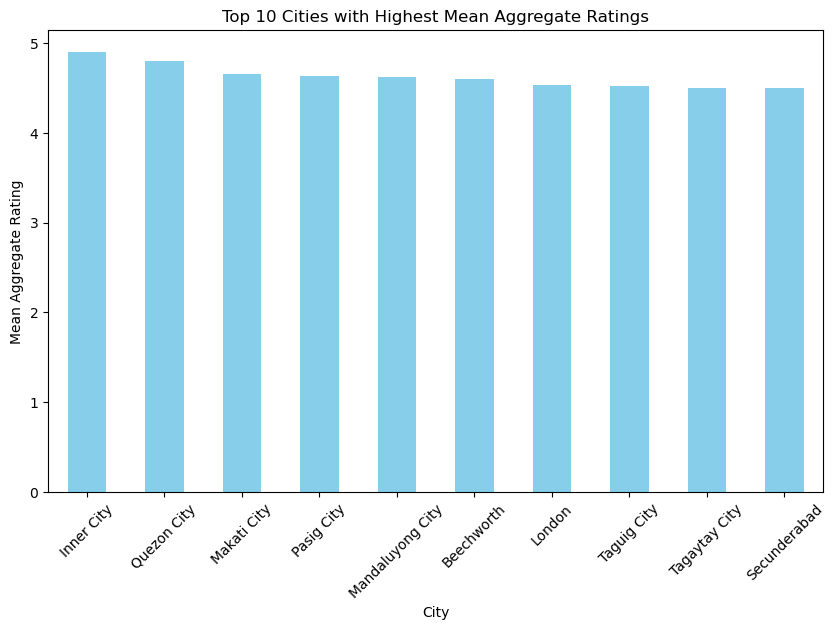

Correlation between city and aggregate rating: -0.33059466865984466


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean aggregate rating for each city
city_mean_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Visualize the top 10 cities with the highest mean aggregate ratings
plt.figure(figsize=(10, 6))
city_mean_rating.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with Highest Mean Aggregate Ratings')
plt.xlabel('City')
plt.ylabel('Mean Aggregate Rating')
plt.xticks(rotation=45)
plt.show()

# Calculate correlation between city and aggregate rating
correlation = df.groupby('City')['Aggregate rating'].mean().corr(df.groupby('City')['Aggregate rating'].count())

print("Correlation between city and aggregate rating:", correlation)


In [15]:
df = df.drop('Restaurant ID', axis=1)
df = df.drop('Restaurant Name', axis=1)
df = df.drop('City', axis=1)
df = df.drop('Country Code', axis=1)
df = df.drop('Address', axis=1)
df = df.drop('Locality', axis=1)
df = df.drop('Longitude', axis=1)
df = df.drop('Latitude', axis=1)
df = df.drop('Currency', axis=1)
df = df.drop('Locality Verbose', axis=1)

In [16]:
df.head()

,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Japanese,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,"Japanese, Sushi",1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,"Japanese, Korean",1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [17]:
df.duplicated().sum()

1179

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,8363.000000,8363.000000,8363.000000,8363.000000
mean,1329.297142,1.901590,3.000694,178.670812
std,17224.321252,0.919377,1.266312,455.286477
min,0.000000,1.000000,0.000000,0.000000
25%,300.000000,1.000000,2.800000,11.000000
50%,500.000000,2.000000,3.300000,44.000000
75%,700.000000,2.000000,3.800000,155.000000
max,800000.000000,4.000000,4.900000,10934.000000


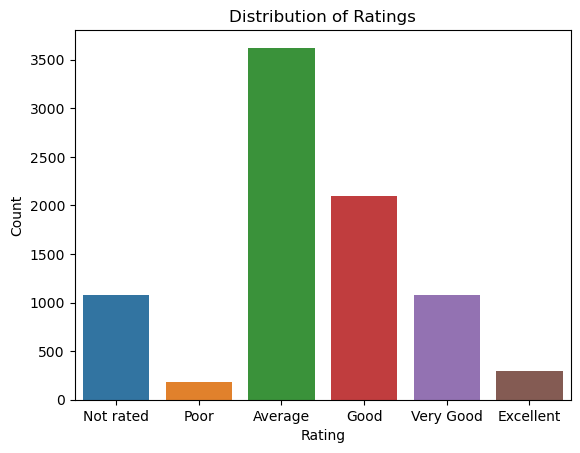

In [20]:
sns.countplot(data=df, x='Rating text', order=['Not rated', 'Poor', 'Average', 'Good', 'Very Good', 'Excellent'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [21]:
# Get the count of each unique rating text
rating_counts = df['Rating text'].value_counts()

# Display the counts
print("Count of each rating category:")
print(rating_counts)

Count of each rating category:
Rating text
Average      3623
Good         2095
Not rated    1081
Very Good    1078
Excellent     300
Poor          186
Name: count, dtype: int64


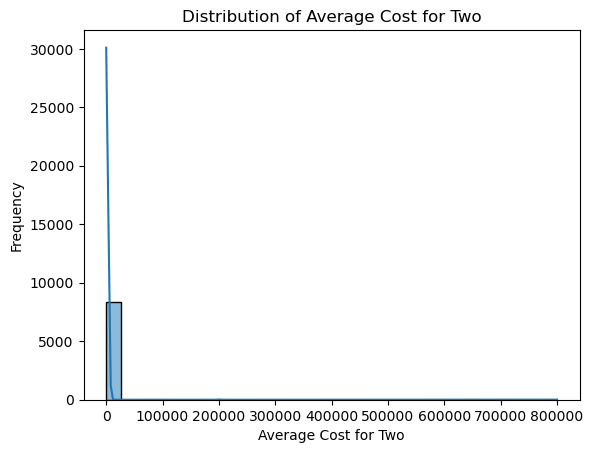

In [22]:
sns.histplot(df['Average Cost for two'], bins=30, kde=True)
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()

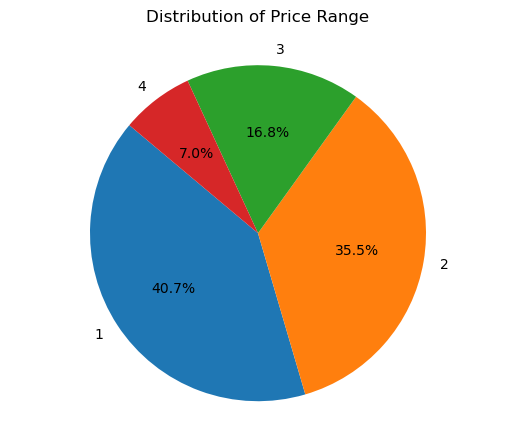

In [23]:
price_counts = df['Price range'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Price Range', y = 1.05)
plt.axis('equal')
plt.show()

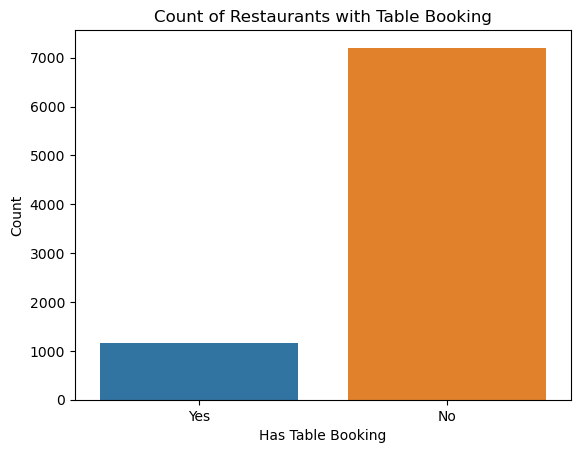

In [24]:
# Countplot of Has Table Booking and Has Online Delivery
#plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Has Table booking')
plt.title('Count of Restaurants with Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Count')
plt.show()

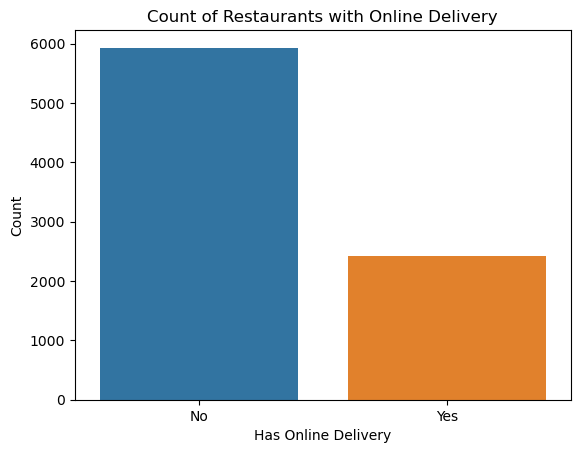

In [25]:
sns.countplot(data=df, x='Has Online delivery')
plt.title('Count of Restaurants with Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Count')
plt.show()

In [26]:
# Exact counts for 'Has Table booking'
table_booking_counts = df['Has Table booking'].value_counts()
print("Count of Restaurants with Table Booking:")
print(table_booking_counts)

# Exact counts for 'Has Online delivery'
online_delivery_counts = df['Has Online delivery'].value_counts()
print("\nCount of Restaurants with Online Delivery:")
print(online_delivery_counts)

Count of Restaurants with Table Booking:
Has Table booking
No     7205
Yes    1158
Name: count, dtype: int64

Count of Restaurants with Online Delivery:
Has Online delivery
No     5933
Yes    2430
Name: count, dtype: int64


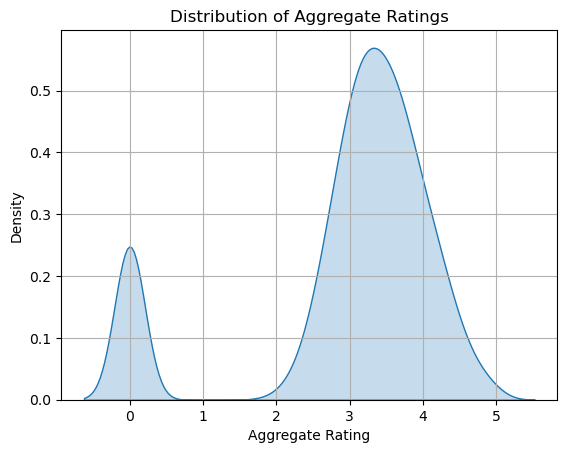

In [27]:
# Create a KDE plot for the 'Aggregate rating' column
sns.kdeplot(data=df['Aggregate rating'], shade=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Density')
plt.grid(True)
plt.show()

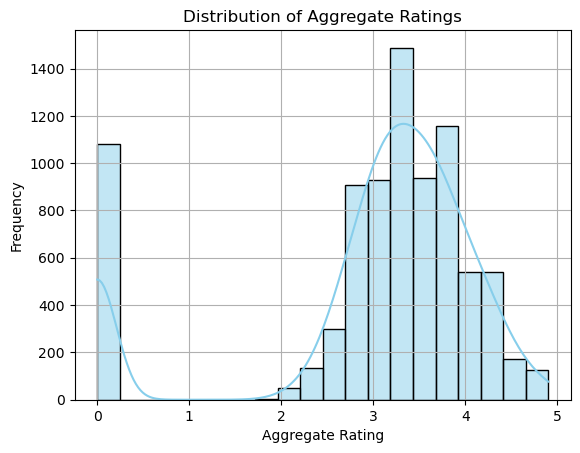

In [28]:
# Create a histogram for the 'Aggregate rating' column
sns.histplot(data=df, x='Aggregate rating', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

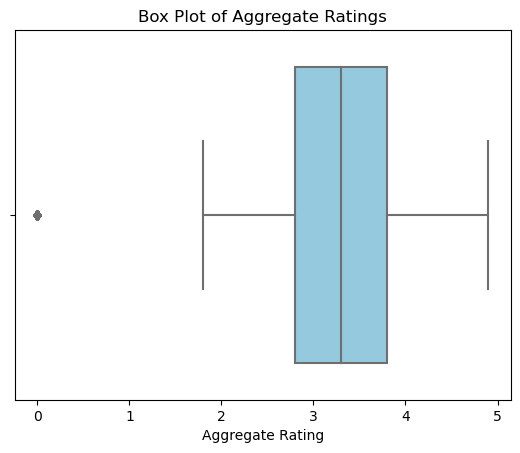

In [29]:
# Create a box plot for the 'Aggregate rating' column
sns.boxplot(data=df, x='Aggregate rating', color='skyblue')
plt.title('Box Plot of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.show()

In [30]:
df.head()

,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Japanese,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,"Japanese, Sushi",1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,"Japanese, Korean",1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Has Table booking'] = label_encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = label_encoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = label_encoder.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = label_encoder.fit_transform(df['Switch to order menu'])

# Define custom mapping dictionaries
rating_color_mapping = {
    'Dark Green': 1,
    'Green': 2,
    'Yellow': 3,
    'Orange': 4,
    'White': 5,
    'Red': 6
}

rating_text_mapping = {
    'Excellent': '1',
    'Very Good': '2',
    'Good': '3',
    'Average': '4',
    'Not rated': '5',
    'Poor': '0'
}

df['Rating color'] = df['Rating color'].map(rating_color_mapping)
df['Rating text'] = df['Rating text'].map(rating_text_mapping)

In [32]:
df.head()

,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,"French, Japanese, Desserts",1100,1,0,0,0,3,4.8,1,1,314
1,Japanese,1200,1,0,0,0,3,4.5,1,1,591
2,"Seafood, Asian, Filipino, Indian",4000,1,0,0,0,4,4.4,2,2,270
3,"Japanese, Sushi",1500,0,0,0,0,4,4.9,1,1,365
4,"Japanese, Korean",1500,1,0,0,0,4,4.8,1,1,229


In [33]:
df.tail()

,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,Turkish,80,0,0,0,0,3,4.1,2,2,788
9547,"World Cuisine, Patisserie, Cafe",105,0,0,0,0,3,4.2,2,2,1034
9548,"Italian, World Cuisine",170,0,0,0,0,4,3.7,3,3,661
9549,Restaurant Cafe,120,0,0,0,0,4,4.0,2,2,901
9550,Cafe,55,0,0,0,0,2,4.0,2,2,591


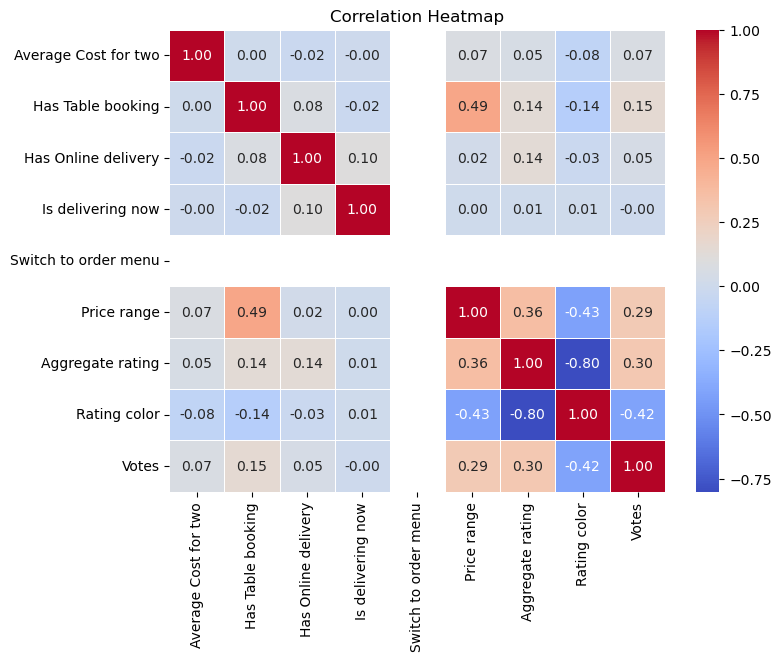

In [34]:
correlation_matrix = df.corr(numeric_only=True) # Calculate correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
X = df.drop(['Aggregate rating', 'Cuisines'], axis=1)
y = df['Aggregate rating']

In [36]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,1,1,314
1,1200,1,0,0,0,3,1,1,591
2,4000,1,0,0,0,4,2,2,270
3,1500,0,0,0,0,4,1,1,365
4,1500,1,0,0,0,4,1,1,229
...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,2,2,788
9547,105,0,0,0,0,3,2,2,1034
9548,170,0,0,0,0,4,3,3,661
9549,120,0,0,0,0,4,2,2,901


In [37]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 8363, dtype: float64

In [38]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a regression algorithm and train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.4854495141630803
R-squared Score: 0.7036142458485263


In [39]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define the Ridge Regression model with hyperparameter alpha (regularization strength)
alpha = 0.1  # Adjust this value as needed
ridge_model = Ridge(alpha=alpha)

# Create a pipeline with feature scaling
model = make_pipeline(StandardScaler(), ridge_model)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.48544967988924337
R-squared Score: 0.7036141446662768


In [40]:
from sklearn.model_selection import GridSearchCV

# Define the Ridge Regression model
ridge_model = Ridge()

# Define hyperparameters to tune
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best hyperparameters
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Alpha:", best_alpha)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Best Alpha: 10
Mean Squared Error: 0.4855084894587146
R-squared Score: 0.7035782391434768


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.04070836867673678
R-squared Score: 0.9751459622504068


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [43]:
# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [44]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [45]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      random_state=42)

In [46]:
# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 0.03233731733230544
R-squared Score: 0.9802568137259456


In [47]:
import pickle
pickle.dump(best_model,open('Task1_Model.pickle','wb'))

In [48]:
best_model = pickle.load(open('Task1_model.pickle','rb'))

In [49]:
best_model

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      random_state=42)